# Project 1 - Notebook

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': False,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 12}
from matplotlib import cm
plt.rcParams.update(newparams)

In [3]:
def im(grid, title = '', origin = 'lower'):
    plt.imshow(grid, origin=origin)
    plt.colorbar()
    plt.title(title)
    plt.show()

In [2]:
def dirichlet(boundaries, alpha = 1, beta = 1):
    """ Create a one-dimensional vector for Dirichlet conditions. Uses natural ordering.

    Args:
        G (array(4 x M-1)): Matrix with row vectors corresponding respectively to boundary at x = x0, y = y0, x = xend, y = yend
        alpha, beta (floats): Constants as defined in text. Optional arguments. 

    Returns:
        g (array(M-1)^2): One dimensional array meant for use in linear system, using natural ordering
    """
    l, t, r, b = boundaries
    M = t.shape[0] - 1
    N = l.shape[0] - 1         # l is N+1 
    G = np.zeros((N-1, M-1))
    G[0, 1:] += -beta * b[1:M-1]
    G[-1, :-1] += -beta * t[2: M]
    G[:, 0] += -alpha * l[1:N] - beta * l[0:N-1]
    G[:, -1] += -alpha * r[1:N] - beta * r[2:N+1]
    return G.flatten()


# Testing
M = 4
N = 4
l = np.arange(N+1)
t = np.arange(M+1)
r = np.arange(N+1)
b = np.arange(M+1)

g = dirichlet([l, t, r, b], 1, 2)
print(np.flip(g.reshape((N-1,M-1)), 0))

[[-11.  -6. -11.]
 [ -4.   0.  -8.]
 [ -1.  -2.  -9.]]


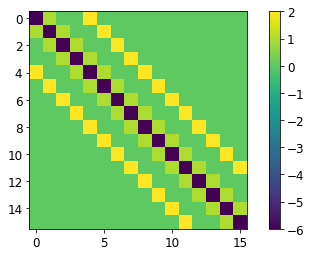

In [5]:
def ndiag(consts, offsets, N):
    """Generate a matrix with arbitrary number of constant diagonals, 0 elsewhere

    Args:
        consts (list of floats):    list containing floats on diagonal
        offsets (list of ints):     list of offsets. Corresponds to the consts list
        N (int):                    length of array

    Returns:
        A (N x N matrix):           matrix with diagonals as specified
    """
    diags = []
    for i in range(len(consts)):
        diags.append(consts[i] * np.ones(N - np.abs(offsets[i])))

    A = np.zeros((N,N))
    for i in range(len(diags)):
        A += np.diag(diags[i], offsets[i])
    return A

# Testing
M = 5
alpha, beta = 1, 2
consts = [beta, alpha, -2*(alpha + beta), alpha, beta]
offsets = [-(M-1), -1, 0, 1, M-1]
A = ndiag(consts, offsets, (M-1)**2)
im(A, origin = 'upper')

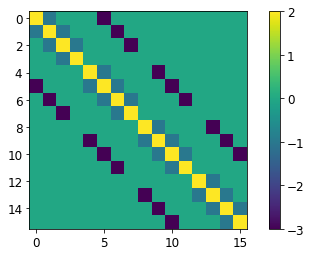

In [6]:
def triblock(C, B, D, M):
    A = np.kron(np.eye(M-1), C)
    A += np.kron(ndiag([1], [1], M-1), B)
    A += np.kron(ndiag([1], [-1], M-1), D)
    return A

# Testing
M = 5
C = ndiag([-1,2,-1], [-1,0,1], (M-1))
B = 3 * ndiag([-1], [1], M-1)
D = 3 * ndiag([-1], [-1], M-1)
A = triblock(C, B,D, M)
im(A, origin='upper')

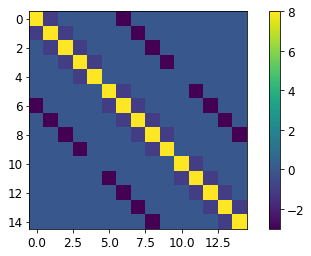

In [7]:
def matrixmaker(alpha, beta, M, N=M):
    C = ndiag([-alpha, 2*(alpha + beta), -alpha], [-1,0,1], M-1)
    B = ndiag([-beta], [1], M-1)
    D = ndiag([-beta], [-1], M-1)
    A = triblock(C,B,D,N)
    return A

# Testing
M = 6
N = 4
A = matrixmaker(1, 3, M, N)
im(A, origin='upper')

## 1a)

In [8]:
def solver(f, boundaries, a, M):
    h = 1/M
 
    A = matrixmaker(a, 1, M, M)
    g = dirichlet(boundaries, a, 1)
    U_vec = np.linalg.solve(A, -g + h**2 * f)
    U = U_vec.reshape((M-1, M-1))
    return U

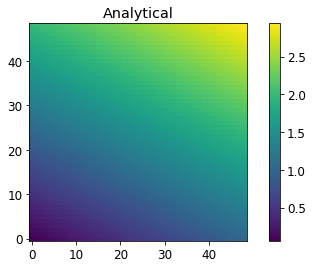

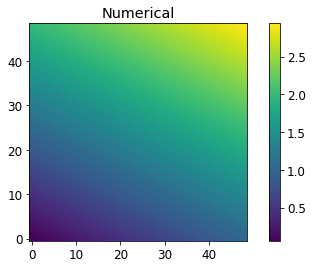

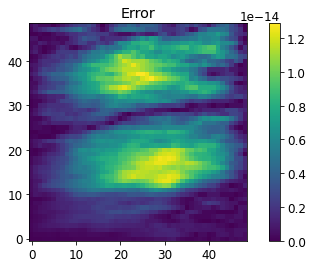

In [9]:
M = 50
h = 1/M
k = 2*h
r = 2
a = 10
x = np.linspace(0, 1, M+1)
y = np.linspace(0, 2, M+1)

def u_exact(x, y):
    return x + y

def f(x, y):
    return x*y*0
xx, yy = np.meshgrid(x, y)

fmat = f(xx, yy)[1:-1, 1:-1]
fvec = fmat.flatten()

U_exact = u_exact(xx, yy)
b = U_exact[0, :]
t = U_exact[-1, :]
l = U_exact[:, 0]
r = U_exact[:, -1]
boundaries = [l,t,r,b]

U = solver(fvec, boundaries, a, M)

im(U_exact[1:-1,1:-1], 'Analytical')

im(U.reshape((M-1,M-1)), 'Numerical')

im(np.abs(U.reshape((M-1, M-1)) - U_exact[1:-1,1:-1]), 'Error')


## 1c)

### Exploring the function

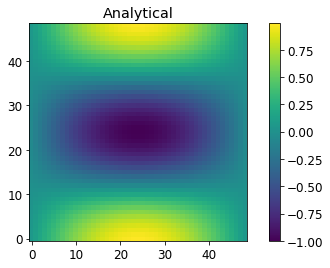

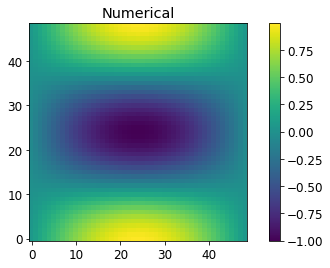

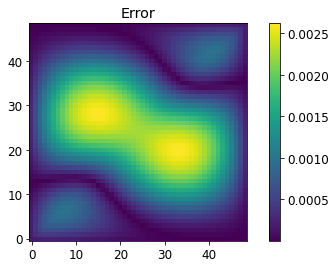

In [10]:
M = 50
h = 1/M
r = 2
a = 0.1
x = np.linspace(0, 1, M+1)
y = np.linspace(0, 2, M+1)

def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

def f(x, y):
    return np.pi**2 * ((a+1+r**2) * np.sin(np.pi * x) * np.cos(np.pi * y) + 2*r * np.cos(np.pi * x) * np.sin(np.pi * y))

xx, yy = np.meshgrid(x, y)
fmat = f(xx, yy)[1:-1, 1:-1]
fvec = fmat.flatten()

U_exact = u_exact(xx, yy)
b = U_exact[0, :]
t = U_exact[-1, :]
l = U_exact[:, 0]
r = U_exact[:, -1]
boundaries = [l,t,r,b]

U = solver(fvec, boundaries, a, M)

im(U_exact[1:-1,1:-1], 'Analytical')

im(U.reshape((M-1,M-1)), 'Numerical')

im(np.abs(U.reshape((M-1, M-1)) - U_exact[1:-1,1:-1]), 'Error')

### Convergence plot

M array:  [16 32 64]


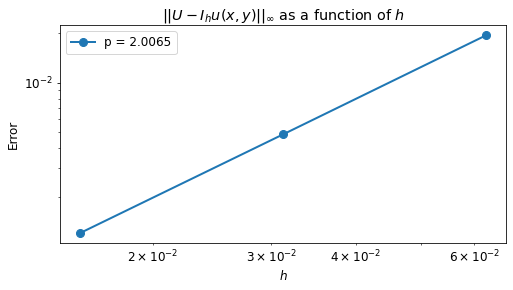

In [11]:
num_points = 3
Ms = 2**np.arange(4, 4+num_points) 
print("M array: ", Ms)
hs = 1 / Ms
r = 2
a = 2

def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

def f(x, y):
    return np.pi**2 * ((a+1+r**2) * np.sin(np.pi * x) * np.cos(np.pi * y) + 2*r * np.cos(np.pi * x) * np.sin(np.pi * y))

errors = np.zeros(num_points)

for i in range(num_points):
    x = np.linspace(0, 1, Ms[i]+1)
    y = np.linspace(0, 2, Ms[i]+1)
    xx, yy = np.meshgrid(x, y)

    f_matrix = f(xx, yy)[1:-1, 1:-1]
    f_vec = f_matrix.flatten()
    U_exact = u_exact(xx, yy)

    bottom = U_exact[0, :]
    top = U_exact[-1, :]
    left = U_exact[:, 0]
    right = U_exact[:, -1]
    boundaries = [left,top,right,bottom]
    
    U = solver(f_vec, boundaries, a, Ms[i])
    errors[i] = np.max(np.abs(U - U_exact[1:-1, 1:-1]))

order = np.polyfit(np.log(hs),np.log(errors), 1)[0]

plt.loglog(hs, errors, '-o', label = 'p = {:.4f}'.format(order))
plt.xlabel(r'$h$')
plt.ylabel('Error')
plt.title(r'$||U-I_hu(x,y)||_\infty$ as a function of $h$')
plt.legend()
plt.show()

## 1d)

In [14]:
def solver_phat(f, boundaries, a, M, N=M):
    h = 1/M

    A = matrixmaker(a, 1, M, N)
    
    g = dirichlet(boundaries, a, 1)
    U_vec = np.linalg.solve(A, -g + h**2 * f)
    U = U_vec.reshape((N-1, M-1))
    return U

M array:  [16 32 64]
N=  12
N=  24
N=  48


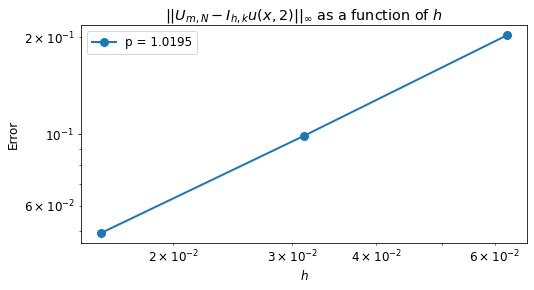

In [17]:
def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

def f(x, y, r):
    return np.pi**2 * ((a+1+r**2) * np.sin(np.pi * x) * np.cos(np.pi * y) + 2*r * np.cos(np.pi * x) * np.sin(np.pi * y))

r = np.exp(1)

num_points = 3
Ms = 2**np.arange(4, 4+num_points) 
print("M array: ", Ms)
hs = 1 / Ms

errors = np.zeros(num_points)

for i in range(num_points):
    M = Ms[i]
    h = hs[i]
    k = h * r
    
    x = np.linspace(0, 1, M+1)
    y = np.arange(0, 2+k, k)

    N = len(y) - 1
    print("N= ", N)
    xx, yy = np.meshgrid(x, y)
    U_exact = u_exact(xx, yy)

    f_matrix = f(xx, yy, r)[1:-1, 1:-1]
    f_vec = f_matrix.flatten()
    U_exact = u_exact(xx, yy)

    bottom = U_exact[0, :]
    top = u_exact(x, 2)
    left = U_exact[:, 0]
    right = U_exact[:, -1]
    right[-1] = top[-1]
    boundaries = [left,top,right,bottom]

    U = solver_phat(f_vec, boundaries, a, M, N)
    errors[i] = np.max(np.abs(U[:,-1] - U_exact[1:-1,-1]))

order = np.polyfit(np.log(hs),np.log(errors), 1)[0]

plt.loglog(hs, errors, '-o', label = 'p = {:.4f}'.format(order))
plt.xlabel(r'$h$')
plt.ylabel('Error')
plt.title(r'$||U_{m,N}-I_{h,k}u(x,2)||_\infty$ as a function of $h$')
plt.legend()
plt.show()